In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
#Lee HC
preds_leehc = pd.read_csv('../../classifiers_results/test_data/BLC_LeeHCRESULTS.csv')

#Lee Covid
preds_leecov = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')



#Oelen et al
preds_egad = pd.read_csv('../../classifiers_results/test_data/BLC_OelenRESULTS.csv')

#SmartSeq3
preds_smartseq = pd.read_csv('../../classifiers_results/test_data/BLC_SmartSeq3RESULTS.csv')


# Histogram over certainty when correct vs uncorrect

In [3]:
preds = pd.concat([preds_leehc, preds_leecov, preds_egad, preds_smartseq])

/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_67476/3574493954.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), size = 14)
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_67476/3574493954.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), size = 14)
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_67476/3574493954.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), size = 14)
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_67476/3574493954.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), size = 14)


[Text(0, 0.0, '0'),
 Text(0, 100.0, '100'),
 Text(0, 200.0, '200'),
 Text(0, 300.0, '300'),
 Text(0, 400.0, '400'),
 Text(0, 500.0, '500')]

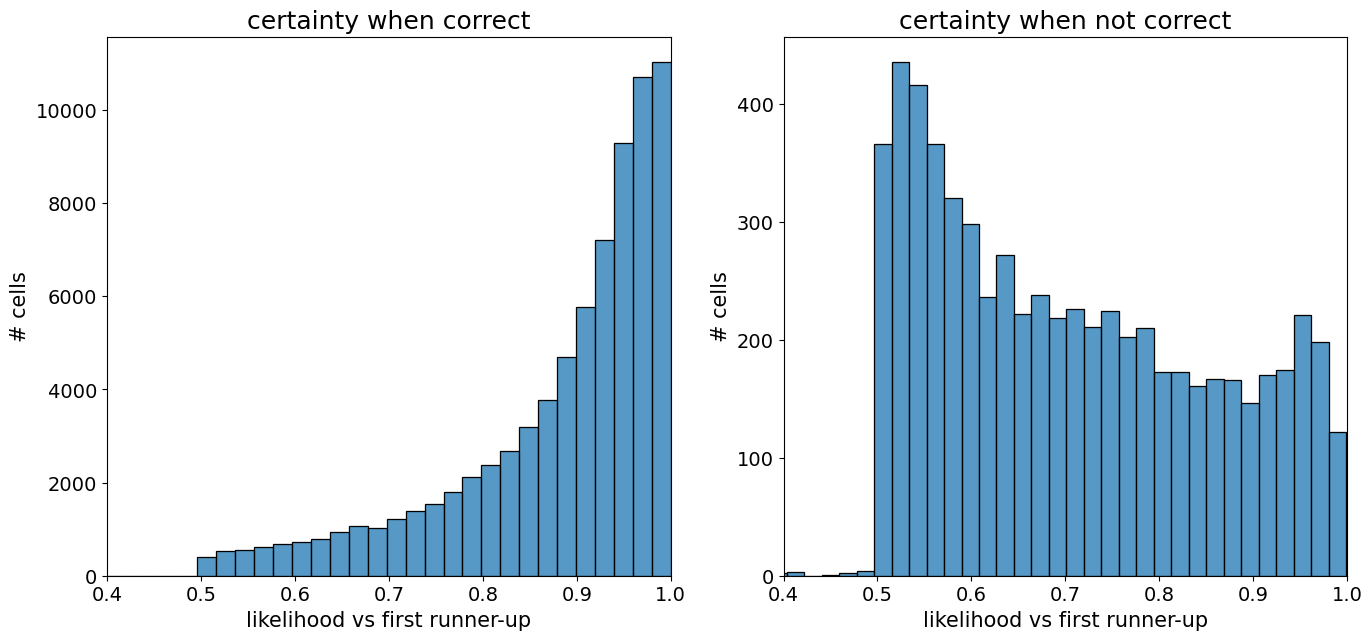

In [4]:
fig, ax = plt.subplots(1,2, figsize = (16,7))
sns.histplot(preds[preds.CellType == preds.ct_pred].likelihood_vs_second_ct, ax = ax[0], bins = 40)
sns.histplot(preds[preds.CellType != preds.ct_pred].likelihood_vs_second_ct, ax = ax[1], bins = 40)
#sns.histplot(preds[preds.actual_ct == preds.label].overall_likelihood, ax = ax[0], bins = 40)
#sns.histplot(preds[preds.actual_ct != preds.label].overall_likelihood, ax = ax[1], bins = 40)

ax[0].set_ylabel('# cells', fontsize = 15)
ax[1].set_ylabel('# cells', fontsize = 15)

ax[0].set_xlabel('likelihood vs first runner-up', fontsize = 15)
ax[1].set_xlabel('likelihood vs first runner-up', fontsize = 15)

ax[0].set_title('certainty when correct', fontsize = 18)
ax[1].set_title('certainty when not correct', fontsize = 18)

ax[0].set_xlim(0.4,1)
ax[1].set_xlim(0.4,1)

ax[0].set_xticklabels(ax[0].get_xticklabels(), size = 14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), size = 14)

ax[0].set_yticklabels(ax[0].get_yticklabels(), size = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), size = 14)

#plt.savefig('Figure4_BLC_histogram_certainty_whencorrectvsnot.svg', format = 'svg', dpi = 200)

# Histogram over correct annotations in runner ups

In [5]:
preds_w = preds[preds.ct_pred != preds.CellType]

In [6]:
len_first = len(preds_w[preds_w.second_most_likely == preds_w.CellType])/len(preds_w)

In [7]:
len_second = len(preds_w[preds_w.third_most_likely == preds_w.CellType])/len(preds_w)

In [8]:
len_notinc = 1-((len(preds_w[preds_w.second_most_likely == preds_w.CellType]) + len(preds_w[preds_w.third_most_likely == preds_w.CellType]))/len(preds_w))

In [9]:
perc_origincluded_BLC = pd.DataFrame({'%first runnerup':len_first, '%second_runnerup':len_second, '%not included':len_notinc}, index = [0])
perc_origincluded_BLC = perc_origincluded_BLC*100

# Percentage runner ups and certainty for scPRED:

In [11]:
#Lee et al combined Covid and HC:
preds_leehc = pd.read_csv('../../classifiers_results/test_data/scPred_LeeHCRESULTS.csv', sep = ';')
preds_leecov = pd.read_csv('../../classifiers_results/test_data/scPred_LeeCovRESULTS.csv', sep = ';')

#EGAD-3hTBstimulation severe only
preds_egad = pd.read_csv('../../classifiers_results/test_data/scPred_OelenRESULTS.csv', sep = ';')

#SmartSeq3
preds_smartseq = pd.read_csv('../../classifiers_results/test_data/scPred_SmartSeq3RESULTS.csv', sep = ';')


In [12]:
preds = pd.concat([preds_leehc, preds_leecov, preds_egad, preds_smartseq])

In [13]:
for col in ['scpred_B', 'scpred_CD4T', 'scpred_CD8T', 'scpred_Classical.Monocyte', 'scpred_DC', 'scpred_Erythrocyte', 'scpred_Granulocyte', 'scpred_NK', 'scpred_Neutrophil', 'scpred_Non_minusclassical.Monocyte', 'scpred_Plasma.B', 'scpred_Platelet', 'scpred_pDC']:
    preds[col.split('_')[1]] = preds[col].copy()

In [14]:
preds['Classical Monocyte'] = preds['scpred_Classical.Monocyte'].copy()
preds['Non-classical Monocyte'] = preds['scpred_Non_minusclassical.Monocyte'].copy()
preds['Plasma B'] = preds['scpred_Plasma.B'].copy()

for c in ['Non-classical Monocyte', 'Neutrophil', 'CD4T', 'Platelet', 'Plasma B', 'Granulocyte', 'Erythrocyte', 'DC', 'CD8T', 'Classical Monocyte', 'NK', 'pDC', 'B']:
    preds[c] = preds[c].str.replace(',', '.')
    preds[c] = [float(x) for x in preds[c]]

In [15]:
tt = preds[['Non-classical Monocyte', 'Neutrophil', 'CD4T', 'Platelet', 'Plasma B', 'Granulocyte', 'Erythrocyte', 'DC', 'CD8T', 'Classical Monocyte', 'NK', 'pDC', 'B', 'CellType', 'scpred_no_rejection']]

In [16]:
tt = tt[tt.CellType != tt.scpred_no_rejection]

In [17]:
comp = tt.iloc[:, :-2]
cts = tt.iloc[:, -2:]

In [18]:
included_first = 0
included_second = 0
not_included = 0
for i in range(len(comp)):
    comp_cts = comp.iloc[i].nlargest(3).sort_values(ascending = False)
    first = comp_cts.index[1]
    second = comp_cts.index[2]
    
    true_ct = cts['CellType'].iloc[i]
    if first in true_ct:
        included_first += 1
        
    elif second in true_ct:
        included_second += 1
    
    else:
        not_included += 1

In [19]:
perc_origincluded_scpred = pd.DataFrame({'%first runnerup':included_first/len(tt), '%second_runnerup':included_second/len(tt), '%not included':not_included/len(tt)}, index = [0])

In [20]:
perc_origincluded_scpred = perc_origincluded_scpred*100

In [21]:
perc_origincluded_BLC = perc_origincluded_BLC.T
perc_origincluded_BLC.columns = ['percentage']

In [22]:
perc_origincluded_scpred = perc_origincluded_scpred.T
perc_origincluded_scpred.columns = ['percentage']

In [23]:
perc_origincluded_BLC['classifier'] = 'BLC'
perc_origincluded_scpred['classifier'] = 'scPred'

In [24]:
perc_origincluded = pd.concat([perc_origincluded_BLC, perc_origincluded_scpred])

In [25]:
perc_origincluded = perc_origincluded.reset_index()

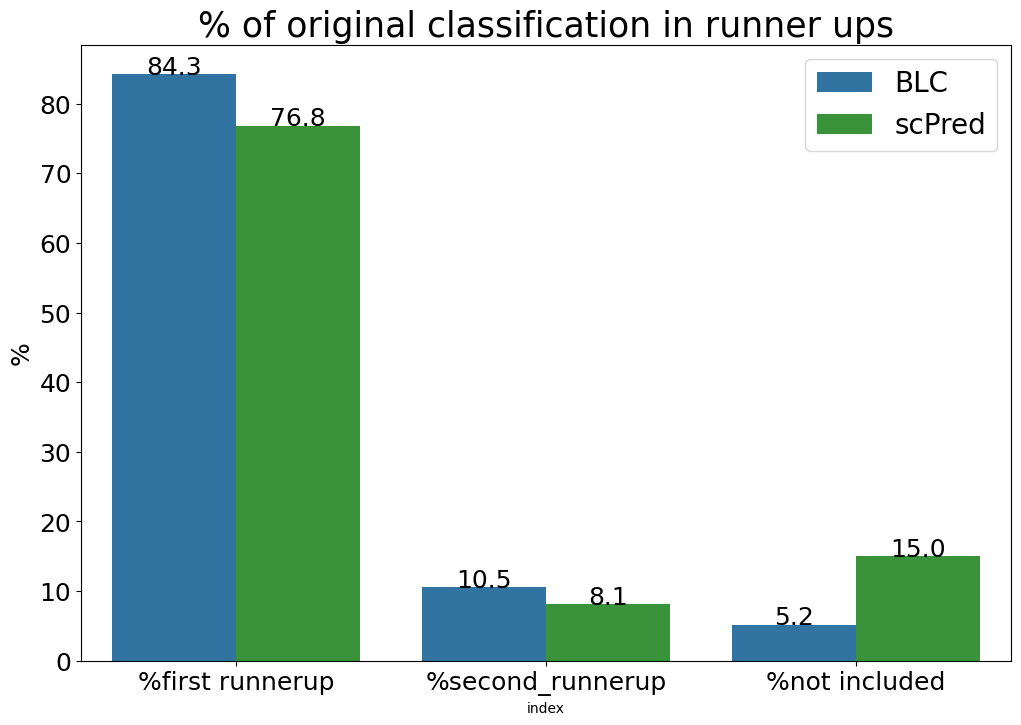

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data = perc_origincluded, x = 'index', y = 'percentage', hue = 'classifier', palette=["tab:blue", "tab:green"])
# show the mean
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2, h+0.001)
    text = np.round(h,1)
    ax.annotate(text=text, xy=xy, ha='center', va='baseline', size = 18)

plt.title('% of original classification in runner ups', fontsize = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel('%', size = 18)
plt.legend(prop={'size':20})

#plt.savefig('Figure4B_percOriginalInRunnerUps_BLCVSscPRED.svg', dpi = 200, format = 'svg')

# Time spent classifying

In [177]:
#Lee et al combined Covid and HC:
preds_leehc = pd.read_csv('../../classifiers_results/test_data/BLC_LeeHCRESULTS.csv')
preds_leecov = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')


#EGAD-3hTBstimulation severe only
preds_egad = pd.read_csv('../../classifiers_results/test_data/BLC_OelenRESULTS.csv')

#SmartSeq3
preds_smartseq = pd.read_csv('../../classifiers_results/test_data/BLC_SmartSeq3RESULTS.csv')


In [178]:
time_taken = [preds_leehc['time_taken'].iloc[0], preds_leecov['time_taken'].iloc[0], preds_egad['time_taken'].iloc[0], preds_smartseq['time_taken'].iloc[0]]
datasets = ['Lee-HC', 'Lee-Covid', 'EGAD-stim', 'SmartSeq']
all_times_BLC = pd.DataFrame({'Time_taken':time_taken, 'Dataset':datasets, 'classifier':'BLC'})

In [180]:
 ### scType ###

#Lee HC
data_sctype = '../../classifiers_results/test_data/scType_LeeHCRESULTS.csv'
hc_res = pd.read_csv(data_sctype, sep = ';')

#Lee_covid
data_sctype = '../../classifiers_results/test_data/scType_LeeCovRESULTS.csv'
cov_res = pd.read_csv(data_sctype, sep = ';')

#Oelen
data_sctype = '../../classifiers_results/test_data/scType_OelenRESULTS.csv'
egad_res = pd.read_csv(data_sctype, sep = ';')

#SmartSeq
data_sctype = '../../classifiers_results/test_data/scType_SmartSeq3RESULTS.csv'
smart_res = pd.read_csv(data_sctype, sep = ';')



In [181]:
time_taken = [hc_res['time_taken_seconds'].iloc[0], cov_res['time_taken_seconds'].iloc[0], egad_res['time_taken_seconds'].iloc[0], smart_res['time_taken_seconds'].iloc[0]]
datasets = ['Lee-HC', 'Lee-Covid', 'EGAD-stim', 'SmartSeq']
all_times_scType = pd.DataFrame({'Time_taken':time_taken, 'Dataset':datasets, 'classifier':'scType'})

In [182]:
all_time = pd.concat([all_times_BLC, all_times_scType])

In [183]:
#Lee et al combined Covid and HC:
scpred_leehc = pd.read_csv('../../classifiers_results/test_data/scPred_LeeHCRESULTS.csv', sep = ';')
scpred_leecov = pd.read_csv('../../classifiers_results/test_data/scPred_LeeCovRESULTS.csv', sep = ';')


#Oelen et al
scpred_egad = pd.read_csv('../../classifiers_results/test_data/scPred_OelenRESULTS.csv', sep = ';')

#SmartSeq3
scpred_smartseq = pd.read_csv('../../classifiers_results/test_data/scPred_SmartSeq3RESULTS.csv', sep = ';')


In [184]:
time_taken = [scpred_leehc['time_taken_seconds'].iloc[0], scpred_leecov['time_taken_seconds'].iloc[0], scpred_egad['time_taken_seconds'].iloc[0], scpred_smartseq['time_taken_seconds'].iloc[0]]
datasets = ['Lee-HC', 'Lee-Covid', 'EGAD-stim', 'SmartSeq']
all_times_scPred = pd.DataFrame({'Time_taken':time_taken, 'Dataset':datasets, 'classifier':'scPred'})

In [185]:
all_time = pd.concat([all_times_BLC, all_times_scType, all_times_scPred])

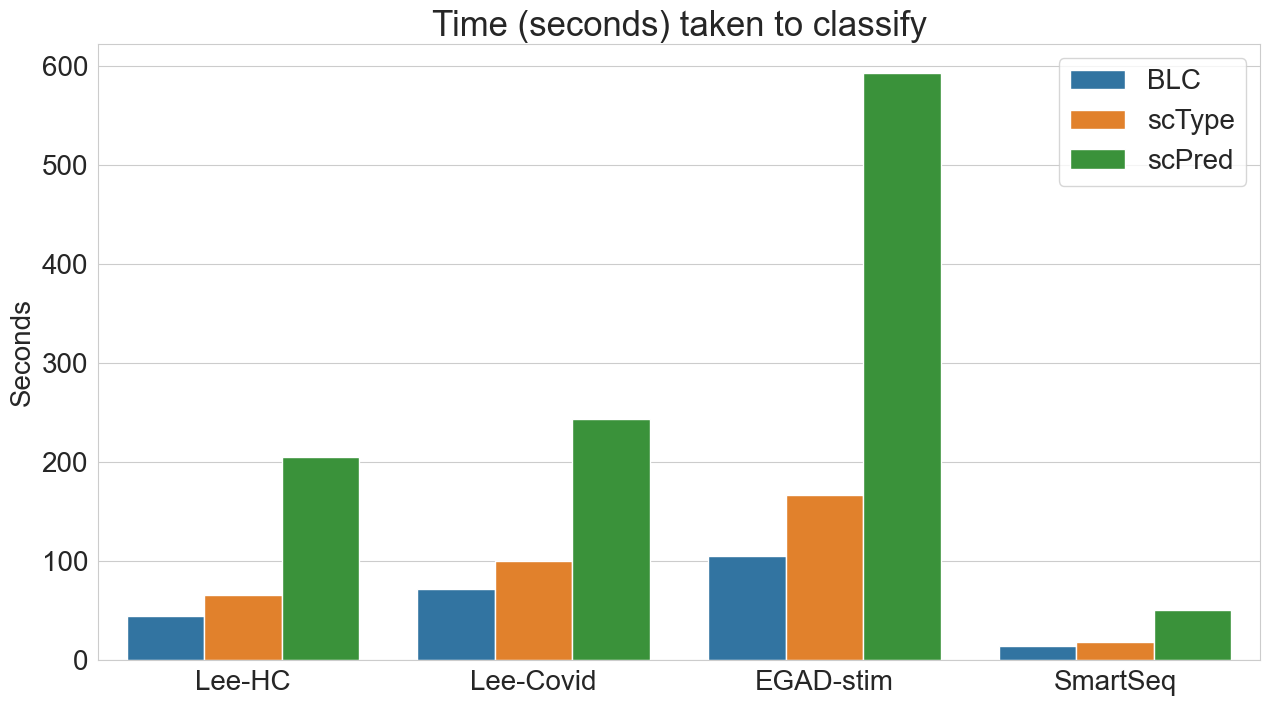

In [186]:
plt.figure(figsize = (15,8))
sns.barplot(all_time, hue = 'classifier', x = "Dataset", y = 'Time_taken')
plt.title('Time (seconds) taken to classify', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Seconds', fontsize = 20)
plt.xlabel('')
plt.legend(prop={'size':20})
#plt.savefig('Figure4C_time_taken_to_classify.svg', bbox_inches = 'tight', dpi = 200, format = 'svg')